<a href="https://colab.research.google.com/github/kkktim/Colab/blob/master/Ch04.%20%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%A7%88%EC%9D%B4%EB%8B%9D%20%EC%8B%A4%EC%8A%B5%20/%201_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
  날짜 : 2022/05/17
  이름 : 강태호
  내용 : 텍스트 분석 전처리
"""

'\n  날짜 : 2022/05/17\n  이름 : 강태호\n  내용 : 텍스트 분석 전처리\n'

In [2]:
#konlpy 패캐지 설치
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 34.6 MB/s 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
import seaborn as sns
from konlpy.tag import Okt

In [8]:
#형태소 분석
okt = Okt()
text = '나는 보리밥을 먹었다.'
result1 = okt.pos(text)
result2 = okt.nouns(text)

print(result1)
print(result2)

[('나', 'Noun'), ('는', 'Josa'), ('보리밥', 'Noun'), ('을', 'Josa'), ('먹었다', 'Verb'), ('.', 'Punctuation')]
['나', '보리밥']


In [9]:
#텍스트 토근화
text = ['You are the best',
        'You are so nice',
        'I love dog',
        'I drink coffee every morning',
        'I hate you']

tokenizer = Tokenizer(num_words=20)
tokenizer.fit_on_texts(text)
word_dic = tokenizer.word_index
word_dic

{'are': 3,
 'best': 5,
 'coffee': 11,
 'dog': 9,
 'drink': 10,
 'every': 12,
 'hate': 14,
 'i': 2,
 'love': 8,
 'morning': 13,
 'nice': 7,
 'so': 6,
 'the': 4,
 'you': 1}

In [10]:
#토근 문자열
sequences = tokenizer.texts_to_sequences(text)
sequences

[[1, 3, 4, 5], [1, 3, 6, 7], [2, 8, 9], [2, 10, 11, 12, 13], [2, 14, 1]]

In [13]:
#패딩처리 - pre: 앞쪽, post:뒤쪽
padded_txt = pad_sequences(sequences, padding='post')
padded_txt

array([[ 1,  3,  4,  5,  0],
       [ 1,  3,  6,  7,  0],
       [ 2,  8,  9,  0,  0],
       [ 2, 10, 11, 12, 13],
       [ 2, 14,  1,  0,  0]], dtype=int32)

In [14]:
#텍스트 탐색분석
train_data = pd.read_table('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/movie_review_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/movie_review_test.txt')
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [16]:
#어휘 빈도수 생성
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

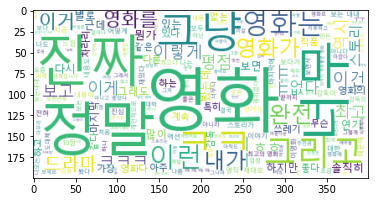

In [27]:
#어휘 빈도 시각화
wc = WordCloud(font_path='/content/drive/MyDrive/파이썬 데이터 과학 실습/file/malgun.ttf', 
               background_color='white').generate(' '.join(train_review))

plt.imshow(wc, interpolation='bilinear')
plt.show()